In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [5]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [6]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

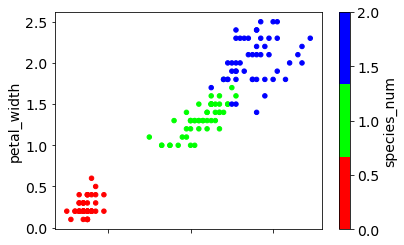

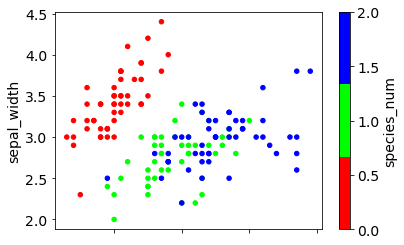

In [7]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'
iris['species_num'] = iris['species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(x='petal_length', y='petal_width', c='species_num', kind='scatter', cmap=cmap_bold)

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(x='sepal_length', y='sepal_width', c='species_num', kind='scatter', cmap=cmap_bold)

## KNN Classification of the Iris Dataser

In [8]:
# Create feature matrix "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

In [9]:
#Create target vector 'y'
y = iris.species_num

In [11]:
#Split data into train and test sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Import KNN From scikit-learn and Instatiate a Model With One Neighbor

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
#intialize model and set n_neighbors equal to 1
knn1 = KNeighborsClassifier(n_neighbors=1)

In [14]:
#Train model using training set then use test set to determine accuracy
#Fit the model 
knn1.fit(X_train,y_train)
#Find the accuracy score of the model on the data
score1 = float(knn1.score(X_test,y_test))
print ("The model accurately labelled {:.2f} percent of the data".format(score1*100))

The model accurately labelled 97.78 percent of the data


In [15]:
#create model with 5 neighbors 
#intialize model and set n_neighbors equal to 5
knn5 = KNeighborsClassifier(n_neighbors=5)
#fit the model
knn5.fit(X_train,y_train)
#Find the accuracy score of the model on the data
score5 = float(knn5.score(X_test,y_test))
print ("The model accurately labelled {:.2f} percent of the data".format(score5*100))

The model accurately labelled 97.78 percent of the data


In [16]:
#Accuracy did not change between 1 and 5 neighbors

# Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [20]:
from sklearn.model_selection import cross_val_score

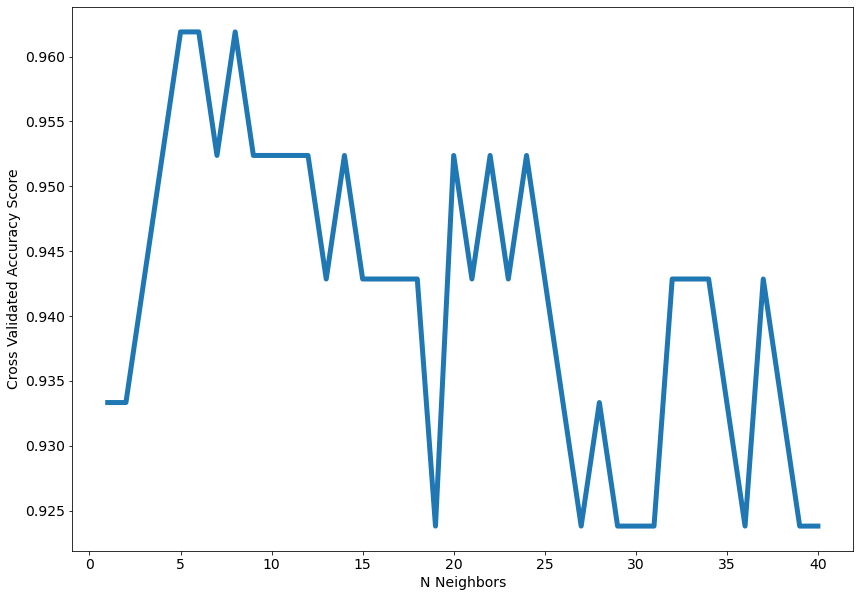

In [21]:
#Initialize neighbors list
neighbors = range(1, 41)
#Intialize list with cross validated scores
cv_scores = []

for i in neighbors:
    #Fit model with i
    model = KNeighborsClassifier(n_neighbors=i)
    cv_score = cross_val_score(model, X_train, y_train, cv =5 , scoring="accuracy").mean()
    #Append cv_score to cv_scores
    cv_scores.append(cv_score)
    
    
#Plot line plot of neighbors vs cv_scores
plt.figure(figsize=(14, 10))
plt.plot(neighbors, cv_scores, linewidth = 5)
plt.xlabel("N Neighbors")
plt.ylabel("Cross Validated Accuracy Score")
plt.show()

In [23]:
sorted(zip(cv_scores, neighbors), reverse=True)
#5 and 6 neighbors result in the best accuracy, would use 5 

[(0.961904761904762, 6),
 (0.961904761904762, 5),
 (0.9619047619047618, 8),
 (0.9523809523809523, 22),
 (0.9523809523809523, 20),
 (0.9523809523809523, 14),
 (0.9523809523809523, 12),
 (0.9523809523809523, 11),
 (0.9523809523809523, 10),
 (0.9523809523809523, 9),
 (0.9523809523809523, 7),
 (0.9523809523809523, 4),
 (0.9523809523809522, 24),
 (0.9428571428571428, 37),
 (0.9428571428571428, 34),
 (0.9428571428571428, 33),
 (0.9428571428571428, 32),
 (0.9428571428571428, 25),
 (0.9428571428571428, 23),
 (0.9428571428571428, 21),
 (0.9428571428571428, 18),
 (0.9428571428571428, 17),
 (0.9428571428571428, 16),
 (0.9428571428571428, 15),
 (0.9428571428571428, 13),
 (0.9428571428571428, 3),
 (0.9333333333333333, 38),
 (0.9333333333333333, 35),
 (0.9333333333333333, 2),
 (0.9333333333333332, 28),
 (0.9333333333333332, 26),
 (0.9333333333333332, 1),
 (0.9238095238095237, 40),
 (0.9238095238095237, 39),
 (0.9238095238095237, 36),
 (0.9238095238095237, 31),
 (0.9238095238095237, 30),
 (0.92380952